In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [5]:
Boston = pd.read_csv('/Users/aravindasv/data science and stats/islp_python/HousingData.csv')

In [22]:
from ISLP import load_data
BostonISLP = load_data('Boston')

In [4]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# rows with atleast one na value
Boston.isna().any(axis=1).sum()

np.int64(112)

In [23]:
BostonISLP.isna().any(axis=1).sum()

np.int64(0)

In [24]:
BostonISLP.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [27]:
BostonISLP.isna().any(axis=1).sum()

np.int64(0)

In [ ]:
"""
ISLP load_data handles the na values behind the scenes. for such columns, i see the mean is slightly higher
shall inspect the NA rows' values and how they are handled later

for the timebeing i will use the ISLP's load_data method and use that dataframe
"""

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

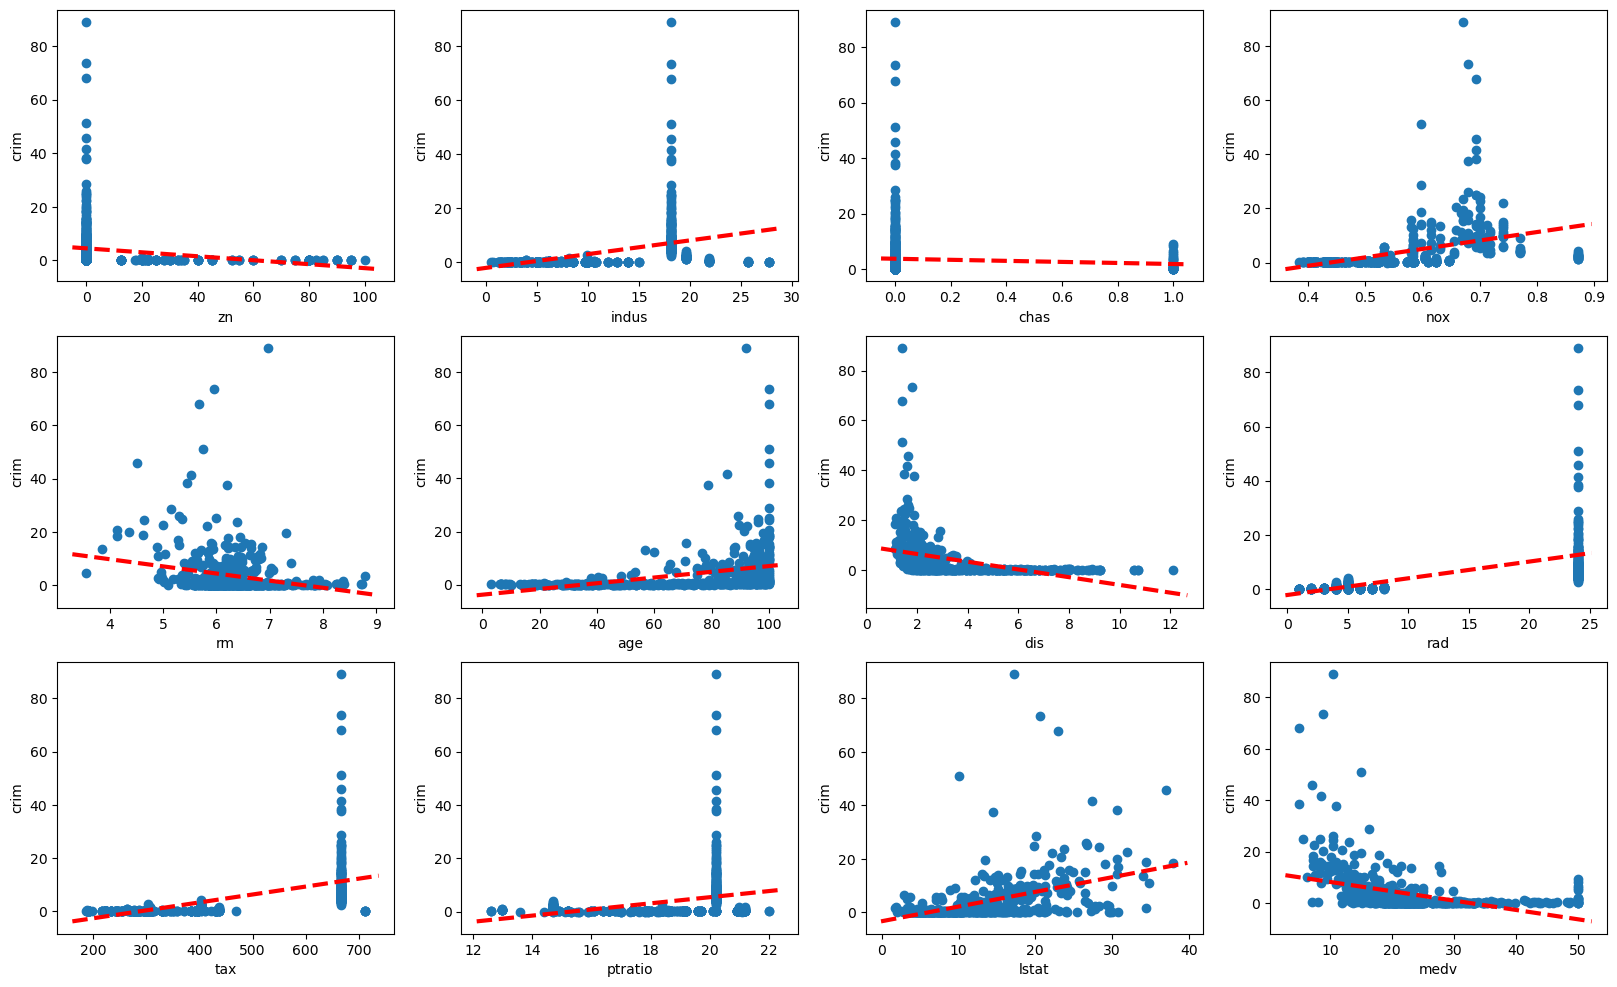

In [42]:
# fit the model with individual predictors, get the coefficients and p stat, plot the scatter plot with regression line
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()
coefficients_univariate = []

y = BostonISLP['crim']
predictors = BostonISLP.columns.drop('crim')
for i, pred in enumerate(predictors):
    X = MS([pred]).fit_transform(BostonISLP)
    results = sm.OLS(y, X).fit()
    coefficients_univariate.append(results.params.iloc[1])
    print(summarize(results))

    axes[i].scatter(BostonISLP[pred], y)
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('crim')

    b = results.params.iloc[0]
    m = results.params.iloc[1]
    
    xlim = axes[i].get_xlim()
    ylim = [ m * xlim[0] + b, m * xlim[1] + b]
    axes[i].plot(xlim,ylim, 'r--', linewidth = 3)

plt.show()

In [28]:
"""
chas - charles river doesnt seem to have significant effect on the model
"""

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [44]:
X = MS(predictors).fit_transform(BostonISLP)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [ ]:
"""
we can reject null hypothesis for medv, rad, dis at 99% confidence level
and reject null hypothesis for zn at 95% confidence level
"""

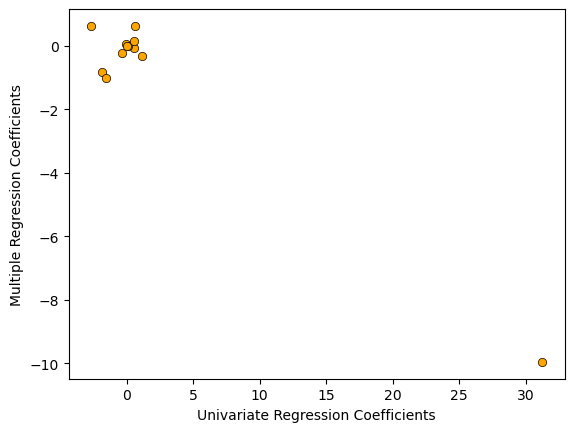

In [45]:
plt.scatter(coefficients_univariate, results.params.iloc[1:], marker='o', facecolors='orange', edgecolors='black', linewidths=0.5);
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients');

In [ ]:
"""
nox seems to be an outlier, where the coefficients changes greatly with the sign turning from +ve to -ve
"""

In [46]:
for predictor in predictors:
    X = MS([poly(predictor, degree=3)]).fit_transform(BostonISLP)
    results = sm.OLS(y, X).fit()
    print(summarize(results))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
                           coef  std err      t  P>|t|
intercept                3.7418    0.396  9.454  0.000
poly(chas, degree=3)[0] -0.0530    0.009 -6.061  0.000
poly(chas, degree=3)[1] -0.0908    0.012 -7.815  0.000
poly(chas, degree=3)[2] -0.2860    0.230 -1.243  0.214
                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11.249    0

In [ ]:
"""
the relationship seems to be polynomial
most of the predictors are now statistically significant, even nox - which seemed like an outlier predictor
"""